## ExMAS
> Exact Matching of Attractive Shared rides (ExMAS) for system-wide strategic evaluations
> 
> Kucharski R., Cats O. ,_Transportation Research Part: B_, 2020

---

> __In the paper we used the actual, rather than synthetic demand. We used albatross Dutch datasets.__

> __You can see how transform your macroscopic OD matrices into the ExMAS microscopic trip request in `ExMAS_utils.load_albatross_csv` or contact me__


### Synthetic demand generation

-----

We generate `params.nP` trip requests (`inData.requests`).

Requests are defined through:
* origin (node of `inData.G` graph)
* destinations (node of `inData.G` graph)
* treq (requested departure time)

----

* origins are drawn from random distribution `math.exp(_params.demand_structure.origins_dispertion*x))`, where `x` is distance from `inData.networkStats.center` (in meters)
* destinations similarly, yet with `_params.demand_structure.destinations_dispertion`
* treq is drawn from uniform distribution between $[t0-T/2,t0+T/2]$, where $t0$ is `params.t0` and $T$ is `params.simTime' (optionally normal distribution may be applied, but it seems impractical)

----

We use function `generate_demand` from `dataStructures.ipynb` to generate the demand

We visualize the demand with `plot_demand` from `utils/plot_utils.ipynb`

----

* `dist` of requerst is given im meters
* `ttrav` of request is either calculated as dist divided by `params.avg_speed` (in [m/s]) or estimated using real-time data (in general travel times shall be estimarted within current study using givwen assumption on trip time and speed).



In [1]:
import os
cwd = os.getcwd()
os.chdir(os.path.join(cwd,'..'))

In [2]:
import ExMAS
import ExMAS_utils
import pprint

In [3]:
from ExMAS_utils import inData as inData

### prepare

1. __load the default config__ (see more details in `ExMAS/notebooks/01 configuration.ipynb`)

In [4]:
params = ExMAS_utils.get_config('data/configs/default.json') # load the default 

### syntehtic demand parameterization

In [5]:
params.nP #number of passengers

200

In [6]:
params.city

'Delft, Netherlands'

In [7]:
params.simTime # demand simulation time [hours]

1

In [17]:
params.demand_structure.destinations_dispertion # controls how destinations are dispersed from center (see negative exponenetial decay function in ExMAS_utils.generate_demand)

-0.001

In [18]:
params.demand_structure.origins_dispertion # controls how origins are dispersed from center

-0.0003

In [8]:
pprint.pprint(params.demand_structure)

{'destinations_dispertion': -0.001,
 'origins_dispertion': -0.0003,
 'temporal_dispertion': 0.3,
 'temporal_distribution': 'uniform'}


2. __load the network__ (see more details in `ExMAS/notebooks/02 NetworkGraphs.ipynb`)

In [9]:
inData = ExMAS_utils.load_G(inData, params, stats=True)  # download the graph

3. __generate trip requests__ (see more details in `ExMAS/notebooks/02 NetworkGraphs.ipynb`)

In [10]:
inData = ExMAS_utils.generate_demand(inData, params)

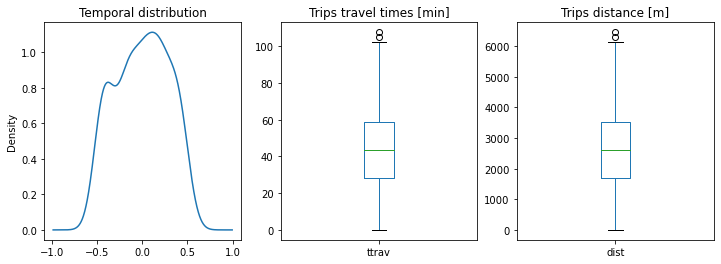

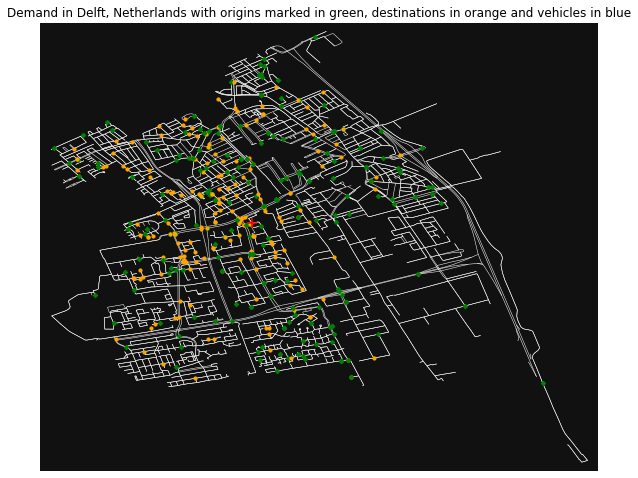

In [11]:
ExMAS_utils.plot_demand(inData, params)

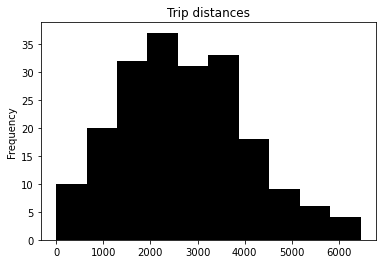

In [12]:
inData.requests.dist.plot(kind='hist',title='Trip distances',color='black')

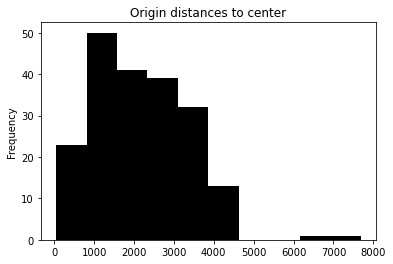

In [13]:
inData.skim[inData.stats['center']][inData.requests.origin].plot(kind='hist', 
                                                                 title='Origin distances to center',
                                                                 color='black')

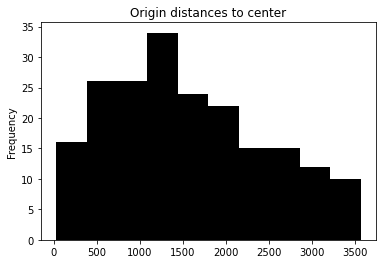

In [14]:
inData.skim[inData.stats['center']][inData.requests.destination].plot(kind='hist', 
                                                                 title='Origin distances to center',
                                                                 color='black')

---
(c) Rafał Kucharski, Delft, 2020